# Unified UpLabel Pipeline

Testing ground for unified labeling pipeline.

In [23]:
import pandas as pd
import configparser
import sys

sys.path.append('../code')
import main
import utils as ut
import complexity as cp
import split as sp

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
config = configparser.ConfigParser()
config.read('../config.ini', encoding='utf-8')

['../config.ini']

In [4]:
data_dir = config['path']['data']

## Input 
Parameters & Upload.
- File (Raw Data + expert labelled)
- Column names
- Extra columns (to be ingored in processing, but output)
- Target column
- Language
- Task Type
- N# labelers (0..*)
- Quality: strict/easy (strict considers tags)

In [5]:
df = pd.read_csv(data_dir+'raw/raw_v1.txt', sep='\t', encoding='utf-8')
df.columns

Index(['text', 'text_b', 'text_a', 'entity', 'entity_type', 'task', 'label',
       'tag', 'comment'],
      dtype='object')

In [6]:
# df.head()

## Prepare Data

- Unified format
- remove duplicates
- Warning message for unknown items
- handle tags

[INFO] Input Length -> 7766
[INFO] Label Counts: 
gracePeriodDate    47
None               28
damageDate         19
documentDate        7
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806
[INFO] Not enough examples for label ('documentDate', 5)

[INFO] Estimating complexity.
[INFO] Data available for training -> 74
[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.75      0.86         4
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        13
   macro avg       0.62      0.55      0.58        13
weighted avg       0.77      0.69      0.73        13

[INFO] Complexity Score -> 1.3460527911394964

[INFO] Applying model to data
	[INFO] Found an empty row during text cleaning.
[INFO] Storing split: C:/Users/makayser/Desktop/ul_label/raw/raw_v1_sp

C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Wall time: 52.4 s


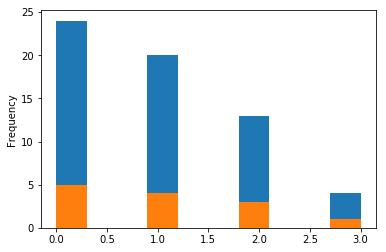

In [58]:
%%time 

df_all, df_splits = main.load_input(data_dir+'raw/raw_v1.txt', 
              cols=['text_b','label','tag'], 
              extras=['entity', 'entity_type', 'comment', 'text'],
              target='label',
              language='de',
              task='cat',
              labelers=1,
              quality=1,
              estimate_clusters=False #force skip cluster estimation, when not enough examples are available
             )

## Estimate Complexity

1. Rule based: minimume requirement per category
2. Spread: Oversampling (SMOTE) or Undersampling?
3. Complexity: preprocessing + supervised (simple TFIDF?)
4. Complexity Score: performance * data quantity   
-- Higher = better

[INFO] Not enough examples for label ('documentDate', 5)
[INFO] Estimating complexity.
[INFO] Data available for training -> 74
[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.75      0.86         4
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        13
   macro avg       0.62      0.55      0.58        13
weighted avg       0.77      0.69      0.73        13



0.6923076923076923

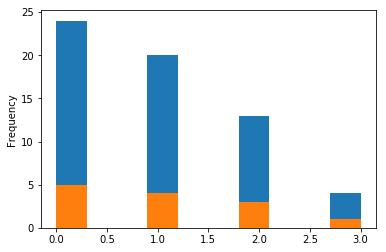

In [10]:
cp.run(df_data, estimate_clusters=False)

## Cluster
Only applies if complexity calculation not sufficient.

1. LDA / K-means

## Determine Split
Overlap

In [46]:
# splits = sp.apply_split(df_all, '../raw.txt', complexity=0.6, labelers=1)

## Output Split
- Split (x exports)
- Include extra columns
- Include label columns: scored, label, comment

### Output Instructions

- Labels:  
-- as defined   
-- None is 'None'  